In [1]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt 

In [2]:
path = 'Y:/laura_berkowitz/behavior_validation/daniel_data/nor/'
file = 'App2899_NovelObjectBaseline_pre-11152021075212-0000DeepCut_resnet50_BehaviorBox10Jan13shuffle1_97000.h5'
#loading output of DLC
Dataframe = pd.read_hdf(path+file)


In [5]:
Dataframe.head()

scorer    DeepCut_resnet50_BehaviorBox10Jan13shuffle1_97000              \
bodyparts                                    toprightcorner               
coords                                                    x           y   
0                                                873.722669  124.336823   
1                                                873.252183  123.540937   
2                                                873.543441  124.295839   
3                                                873.770477  124.480528   
4                                                873.796615  124.998998   

scorer                                                                   \
bodyparts            topleftcorner                        botleftcorner   
coords    likelihood             x           y likelihood             x   
0           0.992762    138.367125  124.100992   0.998196    137.084479   
1           0.993014    137.917987  124.256607   0.997984    136.836670   
2           0.992614    138.143723  123.575783   0.997692    136.934152   
3           0.990802    137.792524  123.346090   0.997179    137.156621   
4           0.988247    138.051258  122.552567   0.998261    137.465792   

scorer                                           ...                         \
bodyparts                        botrightcorner  ...   rightear     leftear   
coords              y likelihood              x  ... likelihood           x   
0          864.890104   0.998811     877.807708  ...   0.999761  869.003375   
1          863.885432   0.998204     876.209065  ...   0.999751  871.185015   
2          864.987942   0.999092     884.166956  ...   0.999868  878.546592   
3          864.104003   0.999106     883.527299  ...   0.999641  880.768145   
4          865.589485   0.998800     883.647442  ...   0.999485  882.190953   

scorer                                                               \
bodyparts                               nose                          
coords              y likelihood           x           y likelihood   
0          821.503402   0.999436  872.072155  844.943701   0.992987   
1          822.737677   0.998622  875.084680  849.876890   0.999189   
2          822.736806   0.998424  877.907827  854.560189   0.999648   
3          824.233323   0.987326  877.503730  859.753995   0.998678   
4          824.795473   0.996176  876.684655  862.578110   0.998675   

scorer                                        
bodyparts    tailbase                         
coords              x           y likelihood  
0          844.952928  726.819375   0.999965  
1          845.139518  728.311987   0.999922  
2          845.948303  732.072967   0.999455  
3          844.963176  734.591526   0.999908  
4          846.665557  737.989553   0.999946  

[5 rows x 24 columns]

In [3]:
import deeplabcut

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))


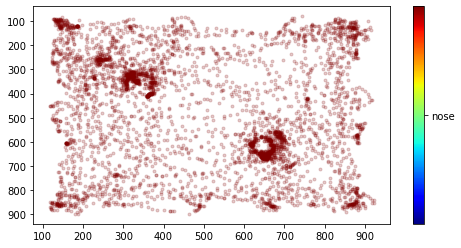

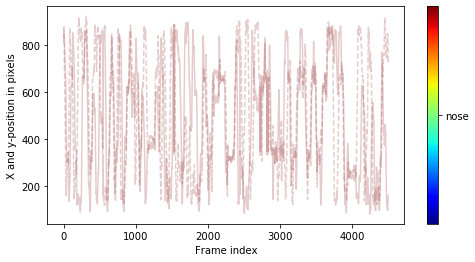

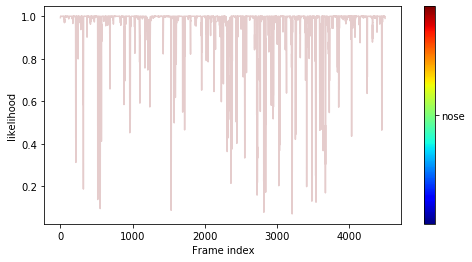

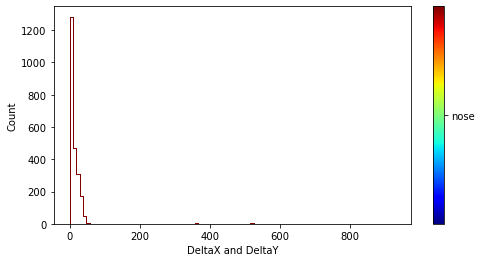

In [9]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,['nose'],alphavalue=.2,pcutoff=.0,fs=(8,4))

In [6]:
bodyparts2plot

Index(['toprightcorner', 'toprightcorner', 'toprightcorner', 'topleftcorner',
       'topleftcorner', 'topleftcorner', 'botleftcorner', 'botleftcorner',
       'botleftcorner', 'botrightcorner', 'botrightcorner', 'botrightcorner',
       'rightear', 'rightear', 'rightear', 'leftear', 'leftear', 'leftear',
       'nose', 'nose', 'nose', 'tailbase', 'tailbase', 'tailbase'],
      dtype='object', name='bodyparts')